<a href="https://colab.research.google.com/github/khushichhajed/sparks-foundation-task/blob/main/task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**


**TASK -1 - Prediction using supervised ML**

**Author - Khushi chhajed**

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING THE DATASET**

*Getting data from online source*


In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Check the shape of dataset.

In [ ]:
data.shape

(25, 2)

*Summary of dataset*

In [ ]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


*Displaying all the columns and there data types*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*Check if there exists any null value*



In [ ]:
data.isnull == True

False

*Dataset does not have any null value*

**DATA VISUALISATION**

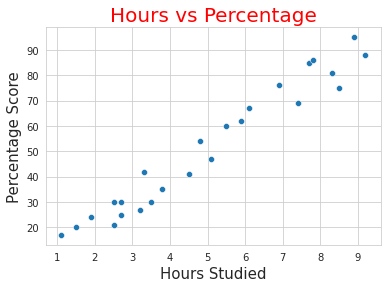

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x= data['Hours'], y= data['Scores'])
plt.title('Hours vs Percentage' , size=20, color='red')  
plt.xlabel('Hours Studied',size=15)  
plt.ylabel('Percentage Score',size=15)  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score .



**REGRESSION LINE**


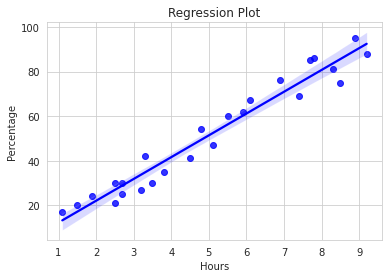

In [ ]:
sns.regplot(x=data['Hours'], y=data['Scores'], color='blue')
plt.title('Regression Plot')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

**Correlation between the attributes**

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Splitting the dataset into TRAINING SET AND TEST SET**

In [ ]:
x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0 )

*Simple Linear Regression to Training set*



In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete")

Training Complete


*Training Complete*

**MAKING PREDICTIONS**

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


**COMPARING THE PREDICTED VS ACTUAL MARKS IN THE DATASET**

In [ ]:
data = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0], 'Actual': y_test.reshape(1,-1)[0], 'Predicted': y_pred.reshape(1,-1)[0]})  
data

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


**ACCURACY OF MODEL**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


*The value of Mean Absolute Error is small, so there are less possibility of errors.*

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours = 9.25
result = regressor.predict([[hours]])
print(result)

[[93.69173249]]


**According to model , if a student studies for 9.5 hours per day, then he/she will score 93.6917 %.**